In [131]:
import os
os.chdir('/Users/suyogbhange/Documents/creative_insights')

import pandas as pd
import numpy as np
import seaborn as sns
# from tqdm import tqdm
# from utils import shortlist_keyword
# from utils import is_cta_copy, is_interest_copy, is_offer_copy
# from config import get_access_token, query_google_ads_api
import matplotlib.pylab as plt
import datetime

In [22]:
df = pd.read_csv('transactions.csv')

In [23]:
df['timestamp']=pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')
df.set_index('timestamp', inplace=True)


In [260]:
df_test.shape

(27164, 2)

In [201]:
cutoff_date = datetime.datetime(2022, 12, 1)
df_train = df[df.index<cutoff_date]
df_test = df[df.index>=cutoff_date]

In [75]:
df['user_id'][8]

'd9b6e335f10a77c53ebeed36af71706b81cf69b670bf6de54b7a507a5b0511c2'

In [126]:
user_df = df[df['user_id'] == 'd9b6e335f10a77c53ebeed36af71706b81cf69b670bf6de54b7a507a5b0511c2']

In [441]:
user_df.head()

,user_id,purchase_value
timestamp,,
2022-08-15 19:12:48.855,d9b6e335f10a77c53ebeed36af71706b81cf69b670bf6d...,548.0
2022-08-16 08:22:24.645,d9b6e335f10a77c53ebeed36af71706b81cf69b670bf6d...,333.0
2022-08-17 01:59:49.963,d9b6e335f10a77c53ebeed36af71706b81cf69b670bf6d...,385.0
2022-08-17 06:06:03.596,d9b6e335f10a77c53ebeed36af71706b81cf69b670bf6d...,183.0
2022-08-17 12:24:44.981,d9b6e335f10a77c53ebeed36af71706b81cf69b670bf6d...,339.0


<AxesSubplot:xlabel='timestamp'>

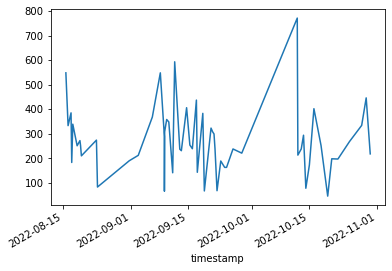

In [128]:
user_df['purchase_value'].plot()

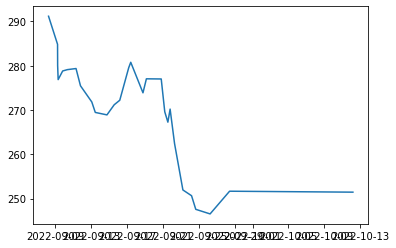

In [129]:
from statsmodels.tsa.seasonal import seasonal_decompose
#ctr_row = [value for value in ctr_row if str(value) != 'nan']
series = user_df['purchase_value']
period = int(len(series)/2)
output = seasonal_decompose(user_df['purchase_value'],period =period).trend
plt.plot(output)


In [121]:
output

timestamp
2022-08-15 18:51:00.152      NaN
2022-08-17 19:16:27.537    292.0
2022-09-03 16:52:10.319    372.0
2022-09-08 16:09:28.540    366.0
2022-10-14 19:06:27.765    249.0
2022-10-15 10:57:44.985    289.0
2022-10-16 17:16:23.261      NaN
Name: trend, dtype: float64

In [45]:
df.index[df.shape[0] -1 ].month

12

In [216]:
# def time_features(user,df):
#     #result_df = pd.DataFrame({'user_id': users}  )
#     rows = []
    
#     df_user = df[df['user_id'] == user]
#     dates = df_user.index
#     df_user['month'] = [el.month for el in dates]
#     df_user['dayofweek'] = [el.dayofweek for el in dates]
#     df_user['dayofyear'] = [el.dayofyear for el in dates]
#     df_user['dayofmonth'] = [el.day for el in dates]
#     df_user['sin_day'] = [np.sin(el.dayofyear) for el in dates]
#     df_user['cos_day'] = [np.cos(el.dayofyear) for el in dates]
#     #df_user['weekend'] = [1 if (el<6 & el>0) else 0 for el in dayofweek]
#     df_user['time_of_day'] = [el.strftime("%p") for el in dates]


        
# #     row = [dates,month,dayofweek,dayofyear,dayofmonth,sin_day,cos_day,weekend,time_of_day]
# #     rows.append(row)
# #     result_df = pd.DataFrame()
#     return df_user
    

In [290]:
def time_features(user,df):
    #result_df = pd.DataFrame({'user_id': users}  )
    rows = []
    
    df_user = df[df['user_id'] == user]
    df_user = df_user.reset_index()
    df_user['month'] = df_user['timestamp'].apply(lambda x: x.month)
    df_user['dayofweek'] = df_user['timestamp'].apply(lambda x: x.dayofweek)
    df_user['dayofyear'] = df_user['timestamp'].apply(lambda x: x.dayofyear)
    df_user['dayofmonth'] = df_user['timestamp'].apply(lambda x: x.day)
    df_user['sin_day'] = df_user['timestamp'].apply(lambda x: np.sin(x.dayofyear))
    df_user['cos_day'] = df_user['timestamp'].apply(lambda x: np.cos(x.dayofyear))
    df_user['time_of_day'] = df_user['timestamp'].apply(lambda x: x.strftime("%p"))
    
    
#     df_user['month'] = [el.month for el in dates]
#     df_user['dayofweek'] = [el.dayofweek for el in dates]
#     df_user['dayofyear'] = [el.dayofyear for el in dates]
#     df_user['dayofmonth'] = [el.day for el in dates]
#     df_user['sin_day'] = [np.sin(el.dayofyear) for el in dates]
#     df_user['cos_day'] = [np.cos(el.dayofyear) for el in dates]
#     #df_user['weekend'] = [1 if (el<6 & el>0) else 0 for el in dayofweek]
#     df_user['time_of_day'] = [el.strftime("%p") for el in dates]


        
#     row = [dates,month,dayofweek,dayofyear,dayofmonth,sin_day,cos_day,weekend,time_of_day]
#     rows.append(row)
#     result_df = pd.DataFrame()
    return df_user
    

In [289]:
time_features('d9b6e335f10a77c53ebeed36af71706b81cf69b670bf6de54b7a507a5b0511c2',df)

,timestamp,user_id,purchase_value,month,dayofweek,dayofyear,dayofmonth,sin_day,cos_day,time_of_day
0,2022-08-15 19:12:48.855,d9b6e335f10a77c53ebeed36af71706b81cf69b670bf6d...,548.0,8,0,227,15,0.721059,0.692874,PM
1,2022-08-16 08:22:24.645,d9b6e335f10a77c53ebeed36af71706b81cf69b670bf6d...,333.0,8,1,228,16,0.972623,-0.232388,AM
2,2022-08-17 01:59:49.963,d9b6e335f10a77c53ebeed36af71706b81cf69b670bf6d...,385.0,8,2,229,17,0.329962,-0.943994,AM
3,2022-08-17 06:06:03.596,d9b6e335f10a77c53ebeed36af71706b81cf69b670bf6d...,183.0,8,2,229,17,0.329962,-0.943994,AM
4,2022-08-17 12:24:44.981,d9b6e335f10a77c53ebeed36af71706b81cf69b670bf6d...,339.0,8,2,229,17,0.329962,-0.943994,PM
5,2022-08-18 14:13:54.701,d9b6e335f10a77c53ebeed36af71706b81cf69b670bf6d...,251.0,8,3,230,18,-0.616064,-0.787696,PM
6,2022-08-19 06:57:18.723,d9b6e335f10a77c53ebeed36af71706b81cf69b670bf6d...,272.0,8,4,231,19,-0.995684,0.092806,AM
7,2022-08-19 10:36:05.480,d9b6e335f10a77c53ebeed36af71706b81cf69b670bf6d...,252.0,8,4,231,19,-0.995684,0.092806,AM
8,2022-08-19 15:38:42.350,d9b6e335f10a77c53ebeed36af71706b81cf69b670bf6d...,210.0,8,4,231,19,-0.995684,0.092806,PM
9,2022-08-23 09:10:07.691,d9b6e335f10a77c53ebeed36af71706b81cf69b670bf6d...,274.0,8,1,235,23,0.580587,-0.814198,AM


In [145]:
total_purchase_value = np.sum(feat_df['purchase_value'])
total_transactions = feat_df.shape[0]
total_months = len(feat_df['month'].unique())
avg_monthly_transactions = total_transactions/total_months
avg_monthly_purchasevalue = total_purchase_value/total_months



In [350]:
diff = feat_df['dayofyear'] - feat_df['dayofyear'].shift(-1)

In [359]:
np.mean(np.abs(diff))

1.3818181818181818

In [151]:
feat_df['is_weekend'] = feat_df['dayofweek'].apply(lambda x: 1 if x>4 else 0)

/var/folders/sm/ptrfftnd5vv0g97fy36j21vh0000gn/T/ipykernel_2043/2012001434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_df['is_weekend'] = feat_df['dayofweek'].apply(lambda x: 1 if x>4 else 0)


In [225]:
feat_df.groupby('is_weekend')['user_id'].count()[]

13

In [176]:
temp_df = pd.DataFrame(feat_df.groupby('is_weekend')['user_id'].count()).reset_index()
weekday_txn = temp_df[temp_df['is_weekend']==0]['user_id'][0]
weekend_txn = temp_df[temp_df['is_weekend']==1]['user_id'][1]

# if temp_df[temp_df['is_weekend']==0]:
#     weekday_txn = temp_df[temp_df['is_weekend']==0]['user_id']
# else:
#     weekday_txn = 0
    
# if temp_df[temp_df['is_weekend']==1]:
#     weekend_txn = temp_df[temp_df['is_weekend']==1]['user_id']
# else:
#     weekend_txn = 0


In [172]:
temp_df = pd.DataFrame(feat_df.groupby('is_weekend')['purchase_value'].sum()).reset_index()
weekday_purchase = temp_df[temp_df['is_weekend']==0]['purchase_value'][0]
weekend_purchase = temp_df[temp_df['is_weekend']==1]['purchase_value'][1]

In [181]:
temp_df = pd.DataFrame(feat_df.groupby('time_of_day')['purchase_value'].sum()).reset_index()
AM_purchase = temp_df[temp_df['time_of_day']=='AM']['purchase_value'][0]
PM_purchase = temp_df[temp_df['time_of_day']=='PM']['purchase_value'][1]

In [187]:
temp_df = pd.DataFrame(feat_df.groupby('time_of_day')['user_id'].count()).reset_index()
AM_txn = temp_df[temp_df['time_of_day']=='AM']['user_id'][0]
PM_txn = temp_df[temp_df['time_of_day']=='PM']['user_id'][1]

37

In [ ]:
features = [user_id,total_purchase_value,total_transactions,
            avg_monthly_transactions,avg_monthly_purchasevalue
           weekday_txn,weekday_purchase,
           weekend_txn,weekend_purchase,
           AM_purchase,AM_txn,
           PM_purchase,PM_txn]

In [136]:
x = user_df.index[0]
print(x.strftime("%p"))

PM


In [203]:
def churned_month(users,df):
    #result_df = pd.DataFrame({'user_id': users}  )
    rows = []
    for user in users:
        df_user = df[df['user_id'] == user]
        first_date = df_user.index[0]
        first_month = first_date.month
        last_date = df_user.index[df_user.shape[0] - 1 ]
        last_month = last_date.month
        #churned_month = abs(first_month - last_month)
        
        row = [user,first_month,last_month]
        rows.append(row)
    result_df = pd.DataFrame(rows, columns = ['user_id', 'first_month', 'last_month'])
    return result_df
    

In [204]:
users = list(df_train['user_id'].unique())

In [205]:
len(users)

22349

In [206]:
label_df = churned_month(users,df_train)

In [209]:
label_df.first_month.value_counts()

8     9053
9     5841
10    4286
11    3169
Name: first_month, dtype: int64

In [210]:
label_df['churned'] = label_df.apply(lambda x: 1 if x['last_month'] != 11 else 0, axis = 1)

In [385]:
time_features('1258b5e2a08d2eac19135def11514e7d85f20bcd249458a4a50a113b5596271c',df_train)


,timestamp,user_id,purchase_value,month,dayofweek,dayofyear,dayofmonth,sin_day,cos_day,time_of_day
0,2022-08-15 18:44:41.006,1258b5e2a08d2eac19135def11514e7d85f20bcd249458...,236.0,8,0,227,15,0.721059,0.692874,PM


## Question 1

### We will approach churn prediction as binary classification model .We take data from 8th month to 10th month and call it df_train and 11th month data as validation set and keep last month data as final_test. Then we label to all the unique cutomers whether they have churned or not . For train data,  we are taking 11th month activity for considering churn . If a cusomer has activity in 11th month we put zero i.e not churned else we put 1 if a customer does not have any transaction in 11th month. Once we get labels, we extract time features from raw data and proceed with building a classification model. We further spilit df_train into training and test sets and take out its accuracy. Once the model is trained we predict on validation set. For validation set we assign label 0 if a customer has activity in 12th month else we put 1. We select all the unique customers in 11t month, take out all the feature data from when they first appeared and use this data to feed the mode lfor prediction.

In [395]:
def prepare_features(label_df,df_train):
    rows = []
    for user in list(label_df['user_id'].unique()):
        
        feat_df = time_features(user,df_train)
        
        total_purchase_value = np.sum(feat_df['purchase_value'])
        total_transactions = feat_df.shape[0]
        avg_transaction_value = total_purchase_value/total_transactions
        total_months = len(feat_df['month'].unique())
        avg_monthly_transactions = total_transactions/total_months
        avg_monthly_purchasevalue = total_purchase_value/total_months
        
        feat_df['is_weekend'] = feat_df['dayofweek'].apply(lambda x: 1 if x>4 else 0)
        
        if len(feat_df['is_weekend'].unique()) == 2 :
            temp_df = pd.DataFrame(feat_df.groupby('is_weekend')['user_id'].count()).reset_index()
            weekday_txn = temp_df[temp_df['is_weekend']==0]['user_id'][0]
            weekend_txn = temp_df[temp_df['is_weekend']==1]['user_id'][1]

            temp_df = pd.DataFrame(feat_df.groupby('is_weekend')['purchase_value'].sum()).reset_index()
            weekday_purchase = temp_df[temp_df['is_weekend']==0]['purchase_value'][0]
            weekend_purchase = temp_df[temp_df['is_weekend']==1]['purchase_value'][1]
            
        elif feat_df['is_weekend'].unique()[0] == 0:
            weekday_purchase = total_purchase_value
            weekday_txn = total_transactions
            weekend_purchase = 0
            weekend_txn = 0
        else :
            weekday_purchase = 0
            weekday_txn = 0
            weekend_purchase = total_purchase_value
            weekend_txn = total_transactions
            
        
        if len(feat_df['time_of_day'].unique()) == 2 :
            temp_df = pd.DataFrame(feat_df.groupby('time_of_day')['purchase_value'].sum()).reset_index()
            AM_purchase = temp_df[temp_df['time_of_day']=='AM']['purchase_value'][0]
            PM_purchase = temp_df[temp_df['time_of_day']=='PM']['purchase_value'][1]

            temp_df = pd.DataFrame(feat_df.groupby('time_of_day')['user_id'].count()).reset_index()
            AM_txn = temp_df[temp_df['time_of_day']=='AM']['user_id'][0]
            PM_txn = temp_df[temp_df['time_of_day']=='PM']['user_id'][1]
        
        elif feat_df['time_of_day'].unique()[0] == 'AM':
            AM_purchase = total_purchase_value
            AM_txn = total_transactions
            PM_purchase = 0
            PM_txn = 0
        else :
            AM_purchase = 0
            AM_txn = 0
            PM_purchase = total_purchase_value
            PM_txn = total_transactions
        
        if feat_df.shape[0] == 1:
            avg_diff = 10000
        else:
            diff = feat_df['dayofyear'] - feat_df['dayofyear'].shift(-1)
            avg_diff = np.mean(np.abs(diff))
            
        actual_days_of_txn = len(feat_df['dayofyear'].unique())
        
        total_days = feat_df.loc[feat_df.shape[0]-1,'dayofyear'] - feat_df.loc[0,'dayofyear']
        if total_days == 0:
            avg_daily_txn = total_transactions
            avg_daily_purchase = total_purchase_value
        else:
            avg_daily_txn = total_transactions/total_days
            avg_daily_purchase = total_purchase_value/total_days
        #avg_weekly_txn = total_transactions/total_days
        
        features = [user,total_purchase_value,total_transactions,
            avg_monthly_transactions,avg_monthly_purchasevalue,
           weekday_txn,weekday_purchase,
           weekend_txn,weekend_purchase,
           AM_purchase,AM_txn,
           PM_purchase,PM_txn,
           avg_transaction_value,avg_diff,
           actual_days_of_txn,avg_daily_txn,avg_daily_purchase]
        
        rows.append(features)
        
    return rows

In [396]:
rows = prepare_features(label_df,df_train)

In [397]:
        
final_df = pd.DataFrame(rows,columns = ['user_id','total_purchase_value','total_transactions',
        'avg_monthly_transactions','avg_monthly_purchasevalue',
       'weekday_txn','weekday_purchase',
       'weekend_txn','weekend_purchase',
       'AM_purchase','AM_txn',
       'PM_purchase','PM_txn',
        'avg_transaction_value','diff',
        'actual_days_of_txn','avg_daily_txn','avg_daily_purchase'])
        
        

In [398]:
final_df.head(15)

,user_id,total_purchase_value,total_transactions,avg_monthly_transactions,avg_monthly_purchasevalue,weekday_txn,weekday_purchase,weekend_txn,weekend_purchase,AM_purchase,AM_txn,PM_purchase,PM_txn,avg_transaction_value,diff,actual_days_of_txn,avg_daily_txn,avg_daily_purchase
0,a37074d6f65e6b64c7cc0a395a155fddb0bb352b471ba3...,2528.0,6,2.000000,842.666667,5,2127.0,1,401.0,1085.0,2,1443.0,4,421.333333,14.400000,6,0.083333,35.111111
1,4482a2d5ad45dddd60d2999ad24ec6e5fbf3e6d1c51310...,2929.0,10,2.500000,732.250000,5,1516.0,5,1413.0,1202.0,3,1727.0,7,292.900000,11.555556,10,0.096154,28.163462
2,d2f058a5db6a391af53fd5d8b3ebe0ba23797d8634babf...,1966.0,8,2.000000,491.500000,5,1440.0,3,526.0,988.0,5,978.0,3,245.750000,12.857143,8,0.088889,21.844444
3,7309ba0c27c3ad5cc616399cfd1febd98afec8c9c8e52a...,1316.0,5,1.666667,438.666667,4,1123.0,1,193.0,309.0,1,1007.0,4,263.200000,24.250000,5,0.051546,13.567010
4,1258b5e2a08d2eac19135def11514e7d85f20bcd249458...,236.0,1,1.000000,236.000000,1,236.0,0,0.0,0.0,0,236.0,1,236.000000,10000.000000,1,1.000000,236.000000
5,b28263b58eaa66c8fd4bed7fb5f029ec15a6f552690036...,2153.0,7,2.333333,717.666667,4,992.0,3,1161.0,140.0,1,2013.0,6,307.571429,10.333333,7,0.112903,34.725806
6,60b932ed29a1b1ecfc582887448ace119b466acdce37b0...,2529.0,12,3.000000,632.250000,6,1373.0,6,1156.0,589.0,3,1940.0,9,210.750000,8.636364,11,0.126316,26.621053
7,e90ba902a58feb8db9a031ceb6824bd27a0184878ca2ca...,733.0,4,1.333333,244.333333,3,568.0,1,165.0,165.0,1,568.0,3,183.250000,35.666667,4,0.037383,6.850467
8,d9b6e335f10a77c53ebeed36af71706b81cf69b670bf6d...,15286.0,56,18.666667,5095.333333,43,11479.0,13,3807.0,9898.0,37,5388.0,19,272.964286,1.381818,40,0.736842,201.131579
9,838157a6f45c15848cfcb144b19d81623d4aa4232810d1...,18725.0,25,6.250000,4681.250000,19,15498.0,6,3227.0,15459.0,20,3266.0,5,749.000000,4.333333,25,0.240385,180.048077


In [399]:
final_df.dropna().shape

(22349, 18)

In [400]:
X = final_df.iloc[:,1:]
y = label_df['churned']

In [401]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train_df, X_test_df,y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [402]:
# X_train_df, y_train = create_time_features(
#     df_training, target='units_sold')
# X_test_df, y_test = create_time_features(df_test, target='units_sold')

# X_train_df=X_train_df.drop('Sales value', axis=1)
# X_test_df=X_test_df.drop('Sales value', axis=1)


scaler = StandardScaler()
scaler.fit(X_train_df)
print(X_train_df.shape)
X_train = scaler.transform(X_train_df)
X_test = scaler.transform(X_test_df)

X_train_df = pd.DataFrame(X_train, columns=X_train_df.columns)
X_test_df = pd.DataFrame(X_test, columns=X_test_df.columns)

cor_matrix = X_train_df.corr().abs()
print(cor_matrix)

# Select upper triangle of correlation matrix
upper = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

(16761, 17)
                           total_purchase_value  total_transactions  \
total_purchase_value                   1.000000            0.913563   
total_transactions                     0.913563            1.000000   
avg_monthly_transactions               0.854529            0.941823   
avg_monthly_purchasevalue              0.951506            0.851259   
weekday_txn                            0.896230            0.983762   
weekday_purchase                       0.981487            0.902220   
weekend_txn                            0.843044            0.916719   
weekend_purchase                       0.914561            0.823750   
AM_purchase                            0.956734            0.864675   
AM_txn                                 0.880568            0.950634   
PM_purchase                            0.846245            0.790241   
PM_txn                                 0.764182            0.858388   
avg_transaction_value                  0.355422            0.1670

/var/folders/sm/ptrfftnd5vv0g97fy36j21vh0000gn/T/ipykernel_2043/2377867243.py:22: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))


In [403]:
to_drop

['avg_monthly_purchasevalue',
 'weekday_txn',
 'weekday_purchase',
 'AM_purchase',
 'AM_txn',
 'actual_days_of_txn']

In [404]:
pd.DataFrame(cor_matrix)

,total_purchase_value,total_transactions,avg_monthly_transactions,avg_monthly_purchasevalue,weekday_txn,weekday_purchase,weekend_txn,weekend_purchase,AM_purchase,AM_txn,PM_purchase,PM_txn,avg_transaction_value,diff,actual_days_of_txn,avg_daily_txn,avg_daily_purchase
total_purchase_value,1.000000,0.913563,0.854529,0.951506,0.896230,0.981487,0.843044,0.914561,0.956734,0.880568,0.846245,0.764182,0.355422,0.309628,0.900746,0.133661,0.050001
total_transactions,0.913563,1.000000,0.941823,0.851259,0.983762,0.902220,0.916719,0.823750,0.864675,0.950634,0.790241,0.858388,0.167092,0.362551,0.978635,0.167589,0.036988
avg_monthly_transactions,0.854529,0.941823,1.000000,0.881102,0.927751,0.843655,0.860668,0.771074,0.810188,0.892989,0.736634,0.812318,0.159767,0.370782,0.907721,0.101783,0.008456
avg_monthly_purchasevalue,0.951506,0.851259,0.881102,1.000000,0.835103,0.932335,0.785559,0.873496,0.912267,0.822698,0.801676,0.708454,0.457705,0.318116,0.831772,0.091884,0.153138
weekday_txn,0.896230,0.983762,0.927751,0.835103,1.000000,0.912821,0.830125,0.749585,0.851371,0.939473,0.769567,0.837380,0.158707,0.349336,0.963591,0.158447,0.033710
weekday_purchase,0.981487,0.902220,0.843655,0.932335,0.912821,1.000000,0.770870,0.820167,0.940972,0.873189,0.827008,0.748817,0.338556,0.299706,0.890225,0.126547,0.050239
weekend_txn,0.843044,0.916719,0.860668,0.785559,0.830125,0.770870,1.000000,0.890467,0.791025,0.861945,0.741884,0.802636,0.165802,0.348670,0.895249,0.167924,0.039866
weekend_purchase,0.914561,0.823750,0.771074,0.873496,0.749585,0.820167,0.890467,1.000000,0.870874,0.786491,0.781482,0.701464,0.346778,0.292022,0.810791,0.132038,0.043270
AM_purchase,0.956734,0.864675,0.810188,0.912267,0.851371,0.940972,0.791025,0.870874,1.000000,0.911509,0.654607,0.594236,0.335371,0.278806,0.853028,0.111159,0.058824
AM_txn,0.880568,0.950634,0.892989,0.822698,0.939473,0.873189,0.861945,0.786491,0.911509,1.000000,0.618754,0.656820,0.167328,0.327056,0.932664,0.142588,0.019096


In [405]:
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

In [406]:


# Drop features 
X_train_df.drop(to_drop, axis=1, inplace=True)
X_test_df.drop(to_drop, axis=1, inplace=True)

# reg = xgb.XGBRegressor(n_estimators=1000)
# reg.fit(X_train_df, y_train,
#         verbose=False)  # Change verbose to True if you want to see it train
# yhat = reg.predict(X_test_df)

In [407]:
xgbc = XGBClassifier()
print(xgbc)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1) 
xgbc.fit(X_train_df, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [408]:
scores = cross_val_score(xgbc, X_train_df, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

 
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, X_train_df, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())


Mean cross-validation score: 0.76
K-fold CV average score: 0.76


In [409]:
y_pred_test = xgbc.predict(X_test_df)
y_pred_train = xgbc.predict(X_train_df)
from sklearn.metrics import accuracy_score
#score = accuracy_score(iris.target, pr)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.8436250820356781
0.7449892627057981


In [410]:
cols_selected =list(X_test_df.columns)

In [411]:

cutoff_date_1 = datetime.datetime(2022, 12, 1)
cutoff_date_2 = datetime.datetime(2022, 11, 1)
df_11month = df[(df.index>=cutoff_date_2) & (df.index<cutoff_date_1)]

In [412]:
label_df['churned_12th'] = label_df.apply(lambda x: 1 if x['last_month'] != 12 else 0, axis = 1)

In [413]:

users_11month = list(df_11month['user_id'].unique())
label_11month = churned_month(users_11month,df)
label_11month['churned'] = label_11month.apply(lambda x: 1 if x['last_month'] != 12 else 0, axis = 1)
# label_11month = label_df[label_df['user_id'].isin(users_11month)]

In [414]:
label_11month.head()

,user_id,first_month,last_month,churned
0,cd297f73ab75b6575b15e09be10a375406736610ad8f1c...,11,12,0
1,1e4e1ff7db650e1eb5310e9ab9f87b223906cbdb1abd94...,10,12,0
2,6b8f6f3f02b842fa4d167844b36b05d03dd519dbd329fd...,8,11,1
3,913c310f56aeeff4996ad6fc2db5a85b27a0ade9dee3c9...,8,12,0
4,bf910e85060383eb0cef171e8e7030c455aee4182b45a8...,8,12,0


In [415]:
feat_11th_month = prepare_features(label_11month,df_train)

In [416]:
feat_11th_month[0]

['cd297f73ab75b6575b15e09be10a375406736610ad8f1c98c443b3d907f2651e',
 1776.0,
 2,
 2.0,
 1776.0,
 2,
 1776.0,
 0,
 0,
 1776.0,
 2,
 0,
 0,
 888.0,
 21.0,
 2,
 0.09523809523809523,
 84.57142857142857]

In [417]:
feat_11th_month_df = pd.DataFrame(feat_11th_month,columns = ['user_id','total_purchase_value','total_transactions',
        'avg_monthly_transactions','avg_monthly_purchasevalue',
       'weekday_txn','weekday_purchase',
       'weekend_txn','weekend_purchase',
       'AM_purchase','AM_txn',
       'PM_purchase','PM_txn',
        'avg_transaction_value','diff',
        'actual_days_of_txn','avg_daily_txn','avg_daily_purchase'])

In [418]:
# df_val = feat_11th_month_df.iloc[:,1:]
# df_val.drop(to_drop, axis=1, inplace=True)
df_val = feat_11th_month_df[cols_selected]

In [419]:
val_pred = xgbc.predict(df_val)

In [420]:
print(accuracy_score(label_11month['churned'], val_pred))

0.6345378635185719


In [421]:
xgb_fea_imp=pd.DataFrame(list(xgbc.get_booster().get_fscore().items()),
columns=['feature','importance']).sort_values('importance', ascending=False)
print('',xgb_fea_imp)

                      feature  importance
0       total_purchase_value       481.0
10        avg_daily_purchase       423.0
5                PM_purchase       391.0
7      avg_transaction_value       358.0
4           weekend_purchase       341.0
9              avg_daily_txn       247.0
8                       diff       213.0
1         total_transactions       138.0
2   avg_monthly_transactions       138.0
3                weekend_txn        87.0
6                     PM_txn        49.0


#### Accuracy on training data  = 0.8436250820356781
####    Accuracy on testing data = 0.7449892627057981
####    Accuracy on validation set = 0.6345378635185719

## Question 2

In [422]:
data = prepare_features(df,df)

In [423]:
dt = pd.DataFrame(data,columns = ['user_id','total_purchase_value','total_transactions',
        'avg_monthly_transactions','avg_monthly_purchasevalue',
       'weekday_txn','weekday_purchase',
       'weekend_txn','weekend_purchase',
       'AM_purchase','AM_txn',
       'PM_purchase','PM_txn',
        'avg_transaction_value','diff',
        'actual_days_of_txn','avg_daily_txn','avg_daily_purchase'])

In [438]:
dt['actual_days_of_txn'].describe()

count    23583.000000
mean         7.567485
std         10.441907
min          1.000000
25%          1.000000
50%          3.000000
75%          9.000000
max        113.000000
Name: actual_days_of_txn, dtype: float64

Text(0.5, 1.0, 'Segments based on total_purchase_value')

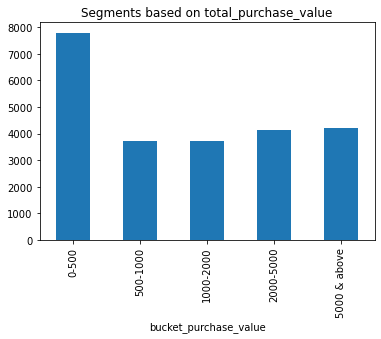

In [425]:
###Segements 
dt['bucket_purchase_value'] = pd.cut(dt.total_purchase_value, [-np.inf,500,1000,2000,5000,
                                  np.inf],
                          labels=['0-500','500-1000','1000-2000','2000-5000','5000 & above'])
dt.groupby('bucket_purchase_value')['user_id'].count().plot.bar()
#plt.xlabel(['0-500','500-1000','1000-2000','2000-5000','5000 & above'])
plt.title('Segments based on total_purchase_value')

Text(0.5, 1.0, 'Segments based on total_txn_value')

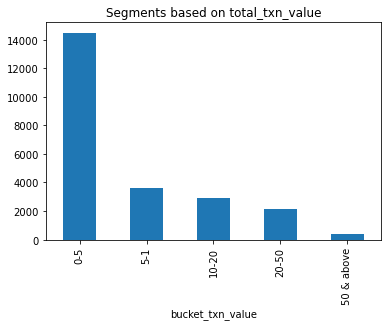

In [426]:
dt['bucket_txn_value'] = pd.cut(dt.total_transactions, [-np.inf,5,10,20,50,
                                  np.inf],
                          labels=['0-5','5-1','10-20','20-50','50 & above'])
dt.groupby('bucket_txn_value')['user_id'].count().plot.bar()
#plt.xticks(['0-5','5-1','10-20','20-50','50 & above'])
plt.title('Segments based on total_txn_value')

Text(0.5, 1.0, 'Segments based on avg_monthly_purchase_value')

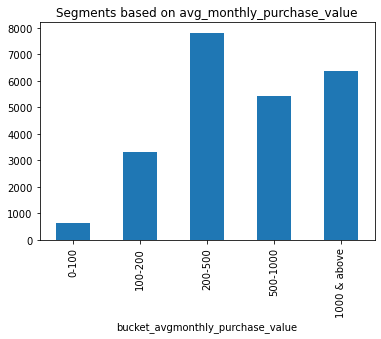

In [427]:
dt['bucket_avgmonthly_purchase_value'] = pd.cut(dt.avg_monthly_purchasevalue, [-np.inf,100,200,500,1000,
                                  np.inf],
                          labels=['0-100','100-200','200-500','500-1000','1000 & above'])
dt.groupby('bucket_avgmonthly_purchase_value')['user_id'].count().plot.bar()
#plt.xlabel(['0-500','500-1000','1000-2000','2000-5000','5000 & above'])
plt.title('Segments based on avg_monthly_purchase_value')

In [428]:
dt['weekend_purchaser'] = dt.apply(lambda x : 1 if x['weekend_purchase'] > x['weekday_purchase'] else 0, axis =1)

Text(0.5, 1.0, 'Segments based on weekend purchase activity')

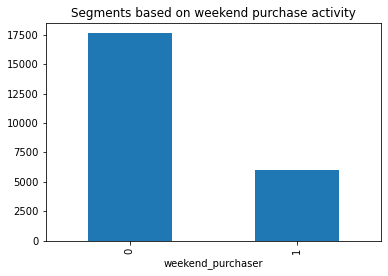

In [429]:
dt.groupby('weekend_purchaser')['user_id'].count().plot.bar()
plt.title('Segments based on weekend purchase activity')

Text(0.5, 1.0, 'Segments based on time_of_day purchase activity')

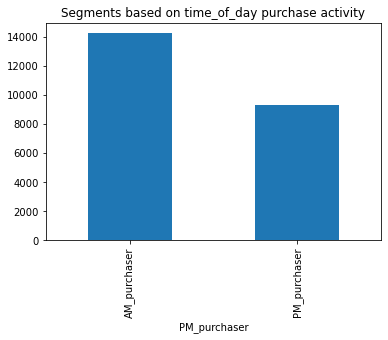

In [430]:
dt['PM_purchaser'] = dt.apply(lambda x : 'PM_purchaser' if x['PM_purchase'] > x['AM_purchase'] else 'AM_purchaser', axis =1)
dt.groupby('PM_purchaser')['user_id'].count().plot.bar()
plt.title('Segments based on time_of_day purchase activity')

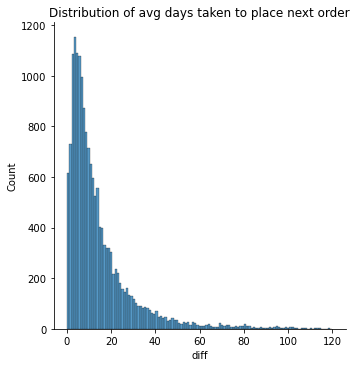

In [434]:
diff = dt[dt['diff'] != 10000.00]
sns.displot(diff, x="diff").set(title = 'Distribution of avg days taken to place next order')

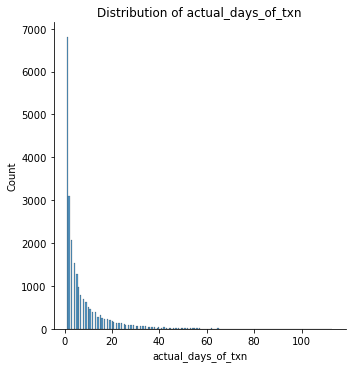

In [440]:
sns.displot(dt, x="actual_days_of_txn").set(title = 'Distribution of actual_days_of_txn')

Text(0.5, 1.0, 'Segments based on avg_transaction_value')

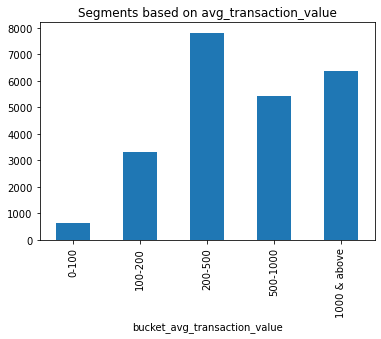

In [437]:
dt['bucket_avg_transaction_value'] = pd.cut(dt.avg_monthly_purchasevalue, [-np.inf,100,200,500,1000,
                                  np.inf],
                          labels=['0-100','100-200','200-500','500-1000','1000 & above'])
dt.groupby('bucket_avg_transaction_value')['user_id'].count().plot.bar()
#plt.xlabel(['0-500','500-1000','1000-2000','2000-5000','5000 & above'])
plt.title('Segments based on avg_transaction_value')

## Question 3

In [299]:
users = list(df['user_id'].unique())


In [298]:
def clv(users,df):
    #result_df = pd.DataFrame({'user_id': users}  )
    rows = []
    for user in users:
        df_user = df[df['user_id'] == user]
        first_date = df_user.index[0]
        first_month = first_date.month
        last_date = df_user.index[df_user.shape[0] - 1 ]
        last_month = last_date.month
        #churned_month = abs(first_month - last_month)
        total_purchase = np.sum(df_user['purchase_value'])
        total_txn = df_user.shape[0]
        row = [user,first_month,last_month,total_purchase,total_txn]
        rows.append(row)
    result_df = pd.DataFrame(rows, columns = ['user_id', 'first_month', 'last_month','total_purchase','total_txn'])
    return result_df

In [300]:
clv_df = clv(users,df)


In [305]:
clv_df['months'] = clv_df.apply(lambda x:x['last_month'] - x['first_month'] +1 , axis =1) 

In [306]:
clv_df['clv'] = clv_df.apply(lambda x:(x['total_purchase']/x['total_txn'])*(x['total_txn']/x['months'])*12, axis=1)

In [312]:
clv_df = clv_df.sort_values('clv', ascending = False)

In [311]:
#### Sorted based on annual CLV value
clv_df.head(20)

,user_id,first_month,last_month,total_purchase,total_txn,months,clv
1126,6961711b409c470a3d507f564b9cecae8ed0018aed8814...,8,12,140449.0,301,5,337077.6
633,f5354c53df8dc0765d04af978f13f7ea386cce114347b6...,8,12,111470.0,174,5,267528.0
15309,3259c7742b22b974329ea5477cac3860c55a2649a8036c...,10,12,64533.0,103,3,258132.0
12341,ee5d63aa12ae9de23c29783531173ccdf023d21a8258c4...,9,12,75505.0,141,4,226515.0
4178,380f8ee41ad209827169691e24d252d55167e29848ff67...,8,12,87981.0,38,5,211154.4
11729,691bd5fb12c5096b35c9a57bfd9b2abc292e001c2147b7...,9,12,64738.0,208,4,194214.0
4276,db3a866397328dba05d9de09a87d40a2599ee74e89abfd...,8,12,79831.0,140,5,191594.4
398,fc1140aa0510eedaaea2a29f3f068a24063c081443c7b2...,8,12,79135.0,84,5,189924.0
1730,710237979d12700d1bcca9c75475ab93fc6a324710c67f...,8,12,73199.0,128,5,175677.6
1735,bc53925b6079a10ba16048ba2fd1b5067d1d9f85f9698d...,8,12,69227.0,66,5,166144.8


### Alternate Machine Learning Model for CLV 

1. We can apply models like ARIMA or SARIMA to predict purchase activity for upcoming months and calculate annual revenue brought by a customer .

2. We can also make a regression model out of available data where we will use the same time features but y label will be revenue gained from a customer . 

